#Problem Statement:
Understand the Target Customers for the marketing team to plan a strategy.

#Context:
Your boss wants you to identify the most important shopping groups based on income, age, and the mall shopping score.

#Outcome expected:
He wants the ideal number of groups with a label for each.

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [137]:
from sklearn.cluster import KMeans

#Object Market Segmentation
Divide your mall target market into approcahable groups. Create subsets of a market based on demographics behavioral criteria to better understand the target for marketing activities.

#The approach



1.   Perform some quick EDA
2.   Use KMEANS Clustering Algorithm to create our segments
3. Use summary statistics on the clusters
4. Visualise





In [138]:
data = pd.read_csv('/content/sample_data/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#Univariate analysis

In [139]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


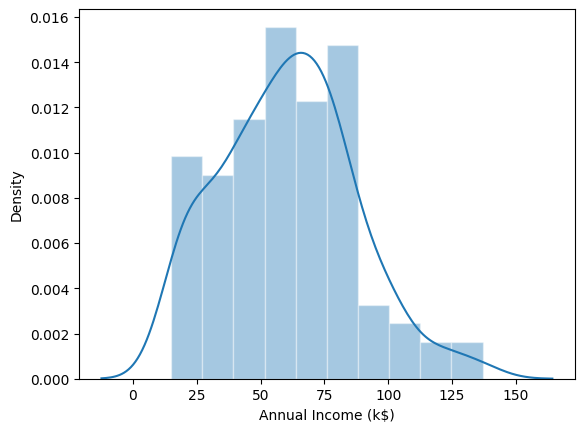

In [140]:
sns.histplot(data['Annual Income (k$)'],kde=True,stat='density',kde_kws=dict(cut=3),alpha=.4, edgecolor=(1, 1, 1, .4))
plt.show()

The blue line is Kernel Density estimate of probability density function

In [141]:
pd.DataFrame.columns

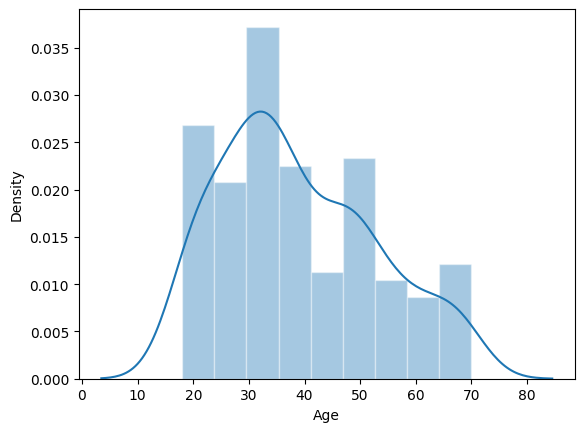

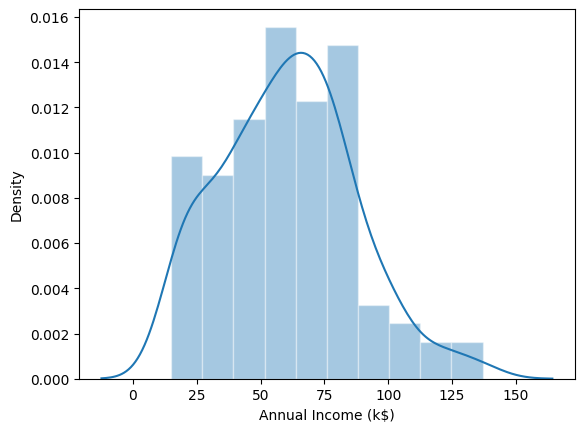

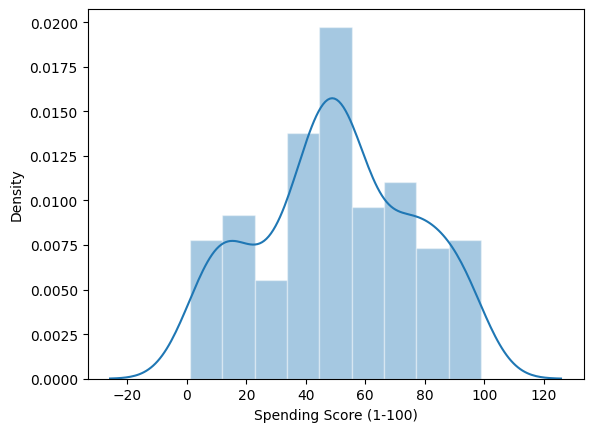

In [142]:
columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in columns:
  sns.histplot(data[i],kde=True, stat='density',kde_kws=dict(cut=3),alpha=.4, edgecolor=(1, 1, 1, .4))
  plt.show()

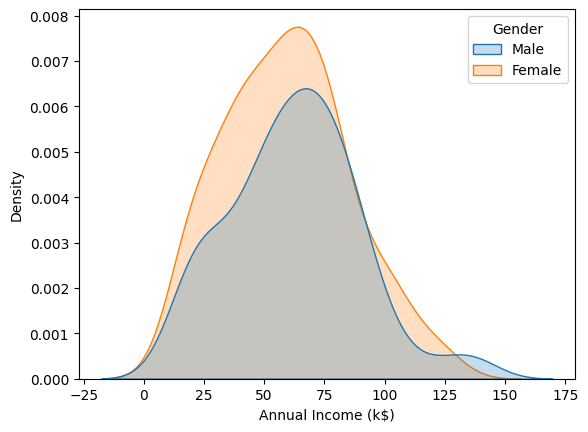

In [143]:
sns.kdeplot(data=data, x="Annual Income (k$)", hue="Gender", fill=True)
plt.show()

Outlier in Male dataset because of a thick tale

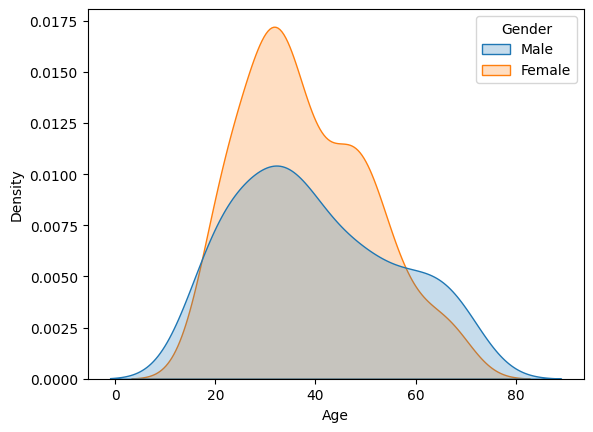

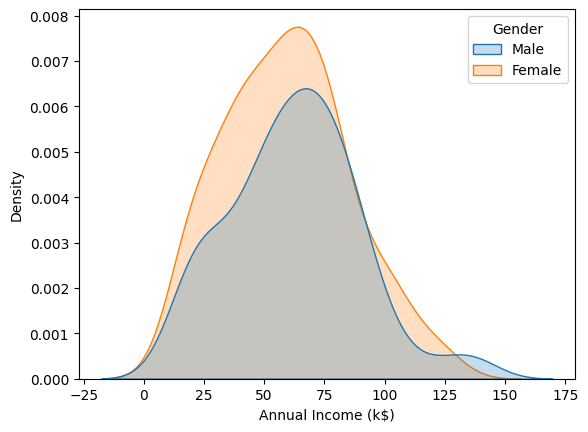

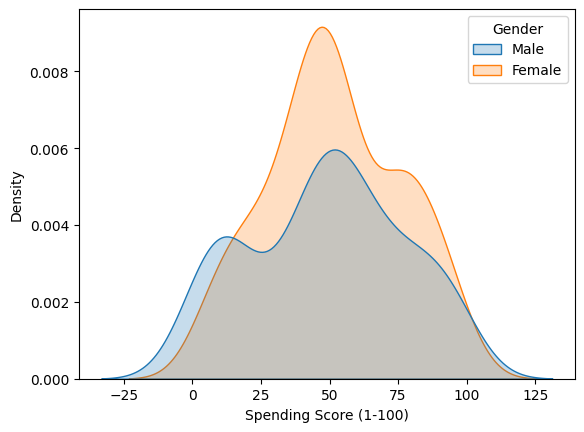

In [144]:
for i in columns:
  plt.figure()
  sns.kdeplot(data=data, x=i, hue="Gender", fill=True)
  plt.show()

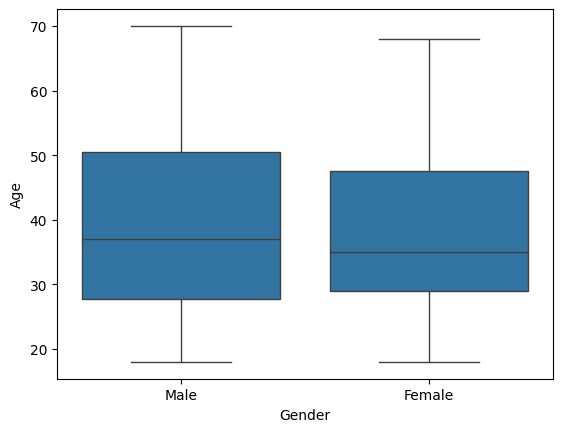

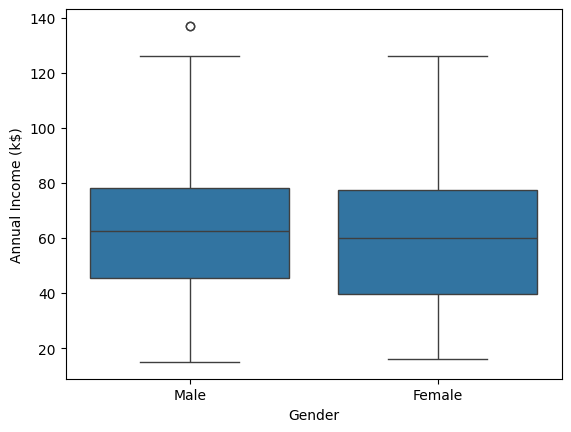

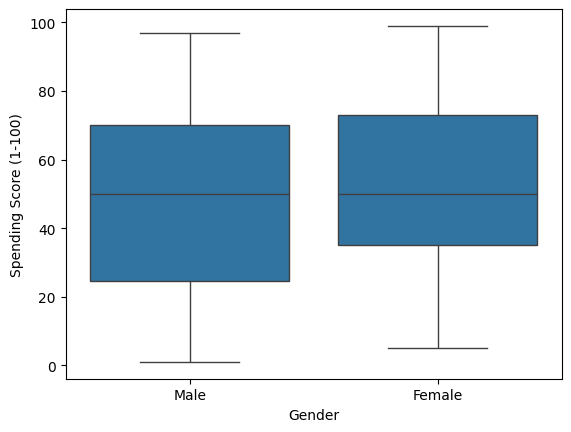

In [145]:
for i in columns:
  plt.figure()
  sns.boxplot(data=data, x='Gender',y=data[i])
  plt.show()

In [146]:
data['Gender'].value_counts(normalize=True)

,proportion
Gender,
Female,0.56
Male,0.44


#Bivariate Analysis

Scatter plots are used for this usually since they are easier to analyse

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

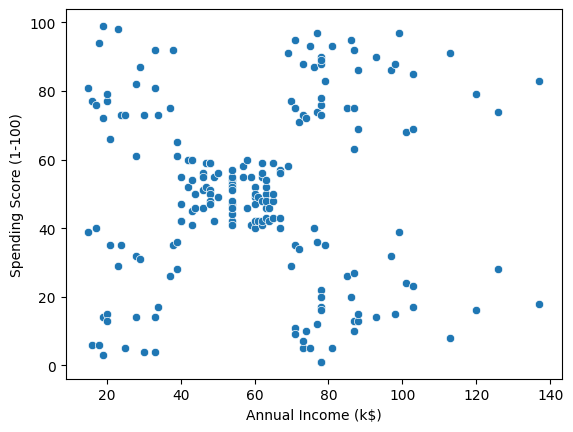

In [147]:
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)')

Seems like there are 5 clusters in the data. Pairplot will give us all the scatter plots and histograms together

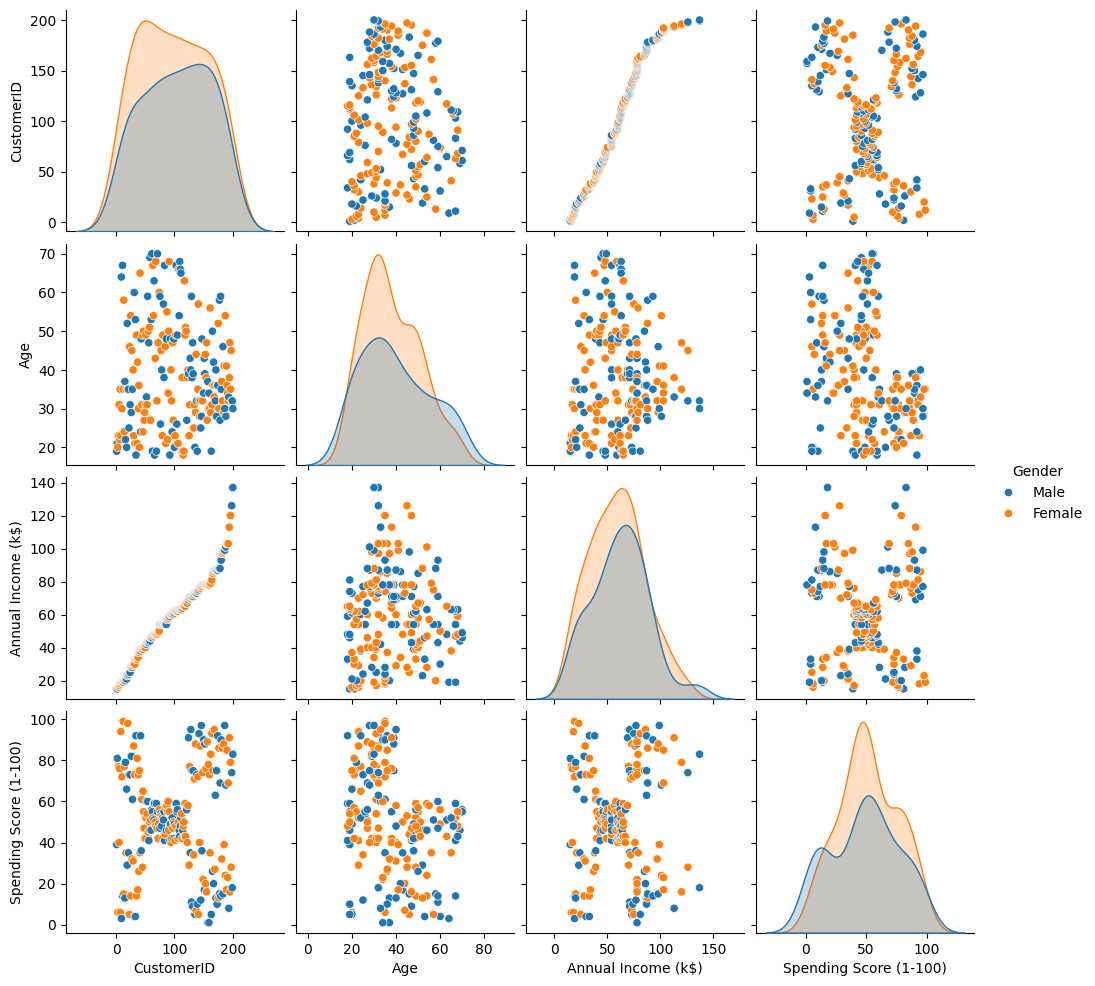

In [148]:
df=data.drop(['CustomerID'],axis=1)
sns.pairplot(data,hue='Gender')

In [149]:
df.groupby(['Gender'])[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [150]:
df[['Age','Annual Income (k$)','Spending Score (1-100)']].corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

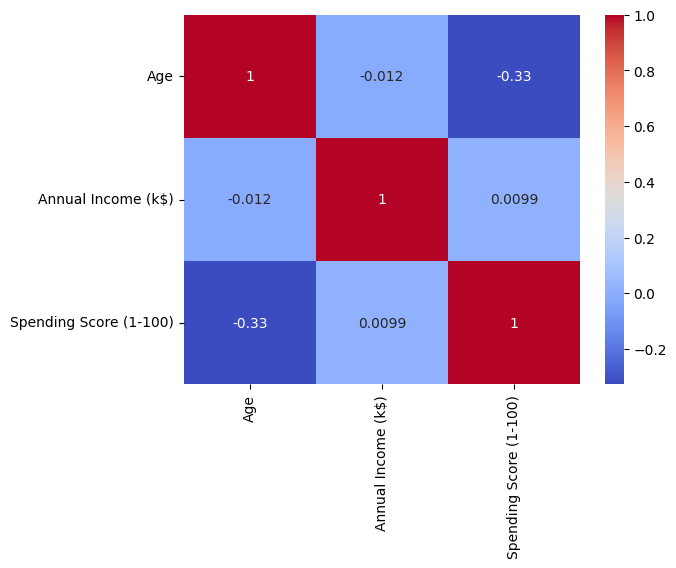

In [151]:
sns.heatmap(df[['Age','Annual Income (k$)','Spending Score (1-100)']].corr(),
            annot=True,cmap='coolwarm')

#Clustering - Univariate, Bivariate and Multivariate

In [152]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [153]:
clust1=KMeans(n_clusters=3)

In [154]:
clust1.fit(df[['Annual Income (k$)']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [155]:
clust1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [156]:
df['Income Cluster'] = clust1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0


In [157]:
df['Income Cluster'].value_counts()

,count
Income Cluster,
2,90
0,74
1,36


Using elbow method to find best number of clusters

In [158]:
clust1.inertia_

23517.33093093092

In [159]:
inertia_score=[]
for i in range(1,11):
  clust1=KMeans(n_clusters=i)
  clust1.fit(df[['Annual Income (k$)']])
  inertia_score.append(clust1.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [160]:
inertia_score

[137277.2800000002,
 48660.88888888887,
 23517.33093093092,
 13278.112713472474,
 8481.49619047619,
 5081.484660267269,
 3931.9880952380995,
 2822.4996947496957,
 2185.590476190477,
 1758.8120490620495]

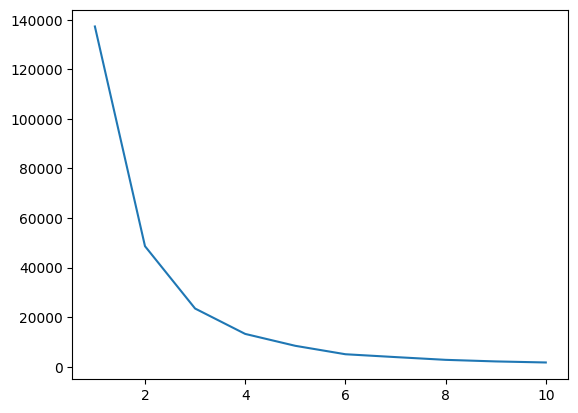

In [161]:
plt.plot(range(1,11), inertia_score)
plt.show()

We look for where the elbow starts from. From the plot above 3 looks like the starting point of a seeming elbow

In [162]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster'],
      dtype='object')

In [163]:
df.groupby(['Income Cluster'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.500000,33.486486,50.229730
1,37.833333,99.888889,50.638889
2,38.722222,67.088889,50.000000


In [164]:
clust2=KMeans(n_clusters=5)
clust2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['Spending_and_income_cluster']=clust2.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [165]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending_and_income_cluster
0,Male,19,15,39,0,4
1,Male,21,15,81,0,0
2,Female,20,16,6,0,4
3,Female,23,16,77,0,0
4,Female,31,17,40,0,4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

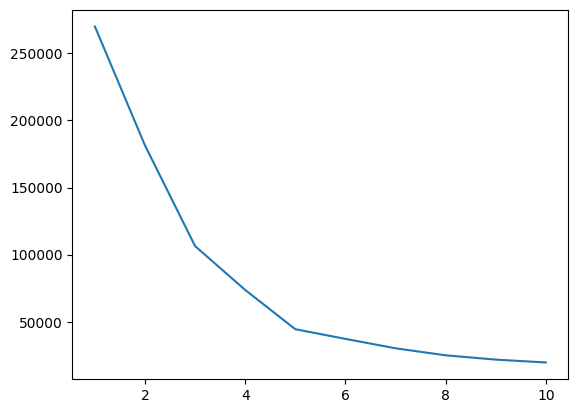

In [166]:
inertia_score2=[]
for i in range(1,11):
  clust2=KMeans(n_clusters=i)
  clust2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
  inertia_score2.append(clust2.inertia_)
plt.plot(range(1,11), inertia_score2)
plt.show()

In [167]:
centres = pd.DataFrame(clust2.cluster_centers_)
centres.columns = ['x','y']
centres.head()

,x,y
0,80.181818,12.681818
1,48.100000,52.675000
2,82.388889,90.444444
3,24.583333,9.583333
4,25.095238,80.047619


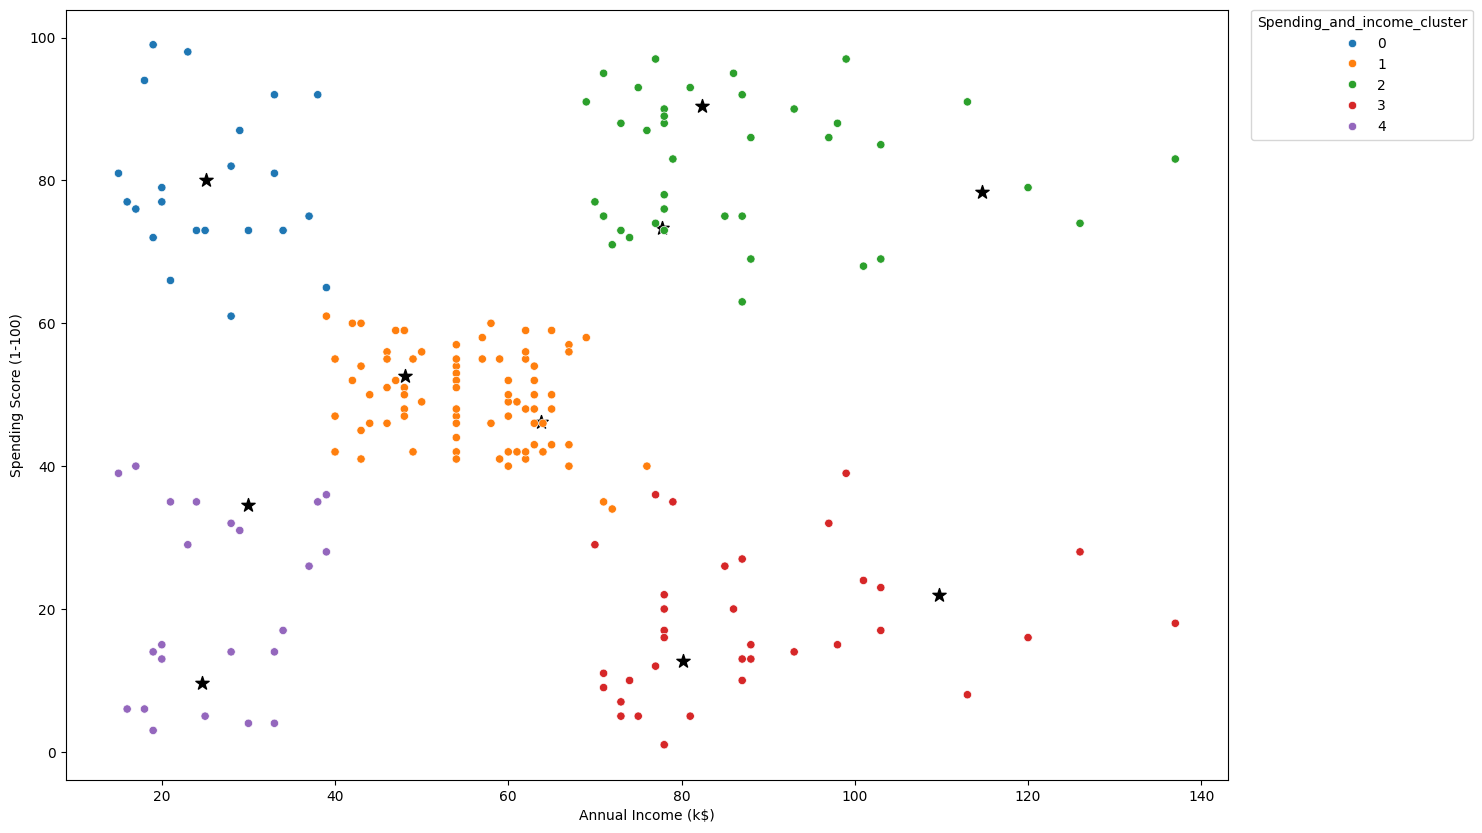

In [168]:
plt.figure(figsize=(15,10))
plt.scatter(x=centres['x'],y=centres['y'],s=100,c='black',
            marker='*')
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Spending_and_income_cluster',palette='tab10')
plt.legend(title="Spending_and_income_cluster",bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [169]:
pd.crosstab(df['Spending_and_income_cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending_and_income_cluster,,
0,0.590909,0.409091
1,0.592593,0.407407
2,0.538462,0.461538
3,0.457143,0.542857
4,0.608696,0.391304


In [170]:
df.groupby(['Spending_and_income_cluster'])[['Age',
                                            'Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending_and_income_cluster,,,
0,25.272727,25.727273,79.363636
1,42.716049,55.296296,49.518519
2,32.692308,86.538462,82.128205
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


Cluster 3 is ideal for us to run campaigns on

# Multivariate clustering

In [171]:
from sklearn.preprocessing import StandardScaler

In [172]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending_and_income_cluster'],
      dtype='object')

In [173]:
df2=pd.get_dummies(df,drop_first=True)
df2.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending_and_income_cluster,Gender_Male
0,19,15,39,0,4,True
1,21,15,81,0,0,True
2,20,16,6,0,4,False
3,23,16,77,0,0,False
4,31,17,40,0,4,False


In [174]:
df2.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending_and_income_cluster', 'Gender_Male'],
      dtype='object')

In [175]:
df2=df2[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
df2.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [176]:
scale=StandardScaler()
df2=scale.fit_transform(df2)

In [177]:
df2=pd.DataFrame(df2)
df2.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

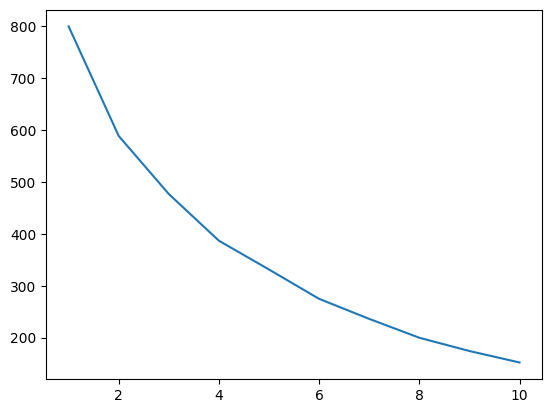

In [178]:
inertia_score3=[]
for i in range(1,11):
  clust3=KMeans(n_clusters=i)
  clust3.fit(df2)
  inertia_score3.append(clust3.inertia_)
plt.plot(range(1,11), inertia_score3)
plt.show()

In [179]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending_and_income_cluster
0,Male,19,15,39,0,4
1,Male,21,15,81,0,0
2,Female,20,16,6,0,4
3,Female,23,16,77,0,0
4,Female,31,17,40,0,4
...,...,...,...,...,...,...
195,Female,35,120,79,1,2
196,Female,45,126,28,1,3
197,Male,32,126,74,1,2
198,Male,32,137,18,1,3


In [181]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [182]:
df['Customer_ID']=data['CustomerID']

In [183]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending_and_income_cluster,Customer_ID
0,Male,19,15,39,0,4,1
1,Male,21,15,81,0,0,2
2,Female,20,16,6,0,4,3
3,Female,23,16,77,0,0,4
4,Female,31,17,40,0,4,5
...,...,...,...,...,...,...,...
195,Female,35,120,79,1,2,196
196,Female,45,126,28,1,3,197
197,Male,32,126,74,1,2,198
198,Male,32,137,18,1,3,199


In [184]:
df.to_csv('Cluster.csv')

#Analysis

**Target Cluster**
*   Target group would be cluster 2 which has high Spending Score and high income
*   54% of cluster 2 shoppers are women. We should look for ways to attract these customers using a marketing campaign using popular items in this cluster
*   Cluster 0 presents an interesting opportunity to msrket to the customers for sales event on popular items

